Gavin Gunawardena \
INFS 770 \
Assignment 1 \
Dr. Liu

Task 1. Basic Python Programming

In [1]:
#task 1.1
def list_ele_idx(li):
    return list(zip(li,[index for index, value in enumerate(li)]))

In [2]:
#task 1.2
print('---------------- task 1.1 test case----------------')
print(list_ele_idx([5,3,2,6])) 

---------------- task 1.1 test case----------------
[(5, 0), (3, 1), (2, 2), (6, 3)]


In [3]:
#task 1.3
def reverse_key_value(dict1):
    dict_keys = list(dict1.values())
    dict_values = list(dict1.keys())
    dict_output = {}
    intermediary = list(zip(dict_keys,dict_values))
    for a, b in intermediary:
        dict_output.setdefault(a, []).append(b)
    return dict_output

In [4]:
#task 1.4
print('---------------- task 1.3 test case----------------')
print(reverse_key_value({"John": "A", "Sarah": "A", "Karen": "B", "Ken": "C"}))# 

---------------- task 1.3 test case----------------
{'A': ['John', 'Sarah'], 'B': ['Karen'], 'C': ['Ken']}


Task 2. Classification Using scikit-learn

In [5]:
#Import necessary packages and setup inline visualization settings
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
#task 2.1
# specify the location to the data file
data_file = "magic04.data"

# define column names
var_names = [
    "fLength",            #1  Status of existing checking account
    "fWidth",            #2  Duration in month
    "fSize",           #3  Credit history
    "fConc",             #4  Purpose
    "fConc1",            #5  Credit amount
    "fAsym",             #6  Savings account/bonds
    "fM3Long",          #7  Present employment since
    "fM3Trans",           #8  Installment rate in percentage of disposable income
    "fAlpha",            #9  Personal status and sex
    "fDist",           #10 Other debtors / guarantors
    "class",           #11 Gamma classification
]

# read from text file
df_data = pd.read_csv(data_file, sep=",", names=var_names)
df_data2 = df_data.copy()
# examine data types
df_data.dtypes

fLength     float64
fWidth      float64
fSize       float64
fConc       float64
fConc1      float64
fAsym       float64
fM3Long     float64
fM3Trans    float64
fAlpha      float64
fDist       float64
class        object
dtype: object

In [7]:
#task 2.2
#count of dependent variable values
print(pd.DataFrame(df_data2["class"].value_counts()))

   class
g  12332
h   6688


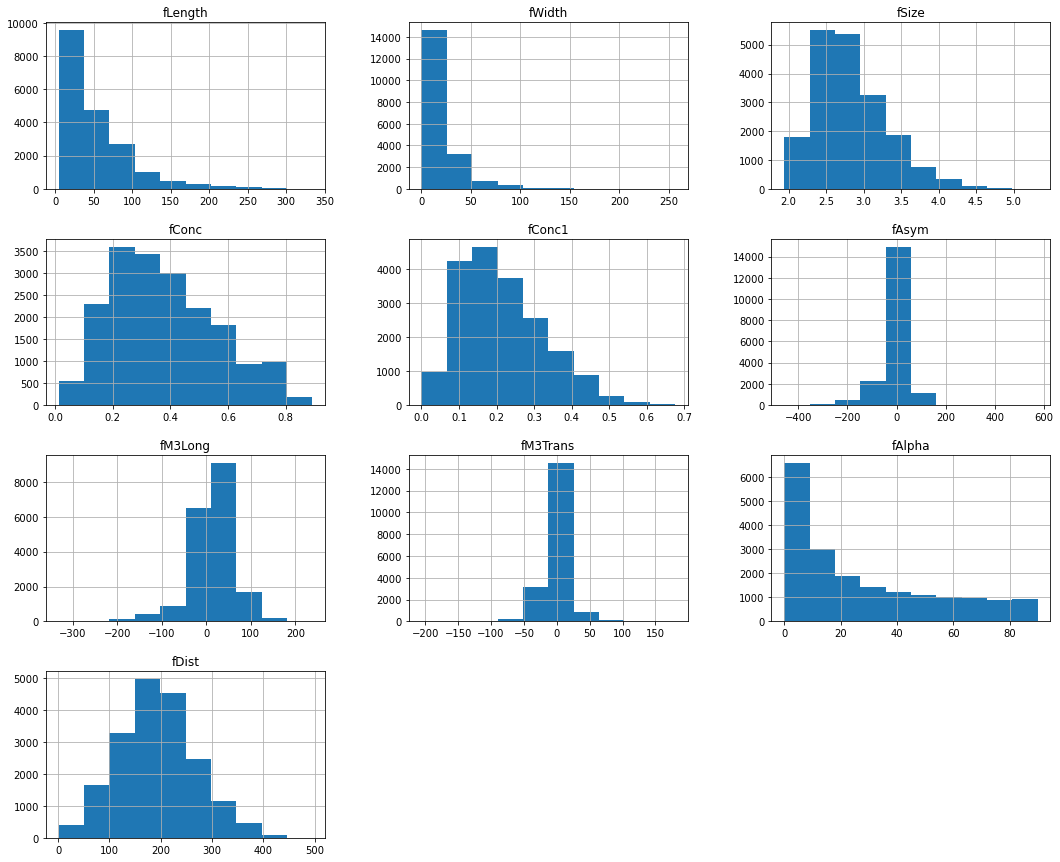

In [19]:
#task 2.3
#histograms of independent variables
df_data2.hist(figsize=(18, 15));

In [9]:
#task 2.4
#Print basic stats of each independent variable
for var_name in var_names:
    print("-"*40)
    print(var_name)
    if df_data2[var_name].dtype == object:
        print(df_data[var_name].value_counts())
    else:
        print(df_data[var_name].describe())

----------------------------------------
fLength
count    19020.000000
mean        53.250154
std         42.364855
min          4.283500
25%         24.336000
50%         37.147700
75%         70.122175
max        334.177000
Name: fLength, dtype: float64
----------------------------------------
fWidth
count    19020.000000
mean        22.180966
std         18.346056
min          0.000000
25%         11.863800
50%         17.139900
75%         24.739475
max        256.382000
Name: fWidth, dtype: float64
----------------------------------------
fSize
count    19020.000000
mean         2.825017
std          0.472599
min          1.941300
25%          2.477100
50%          2.739600
75%          3.101600
max          5.323300
Name: fSize, dtype: float64
----------------------------------------
fConc
count    19020.000000
mean         0.380327
std          0.182813
min          0.013100
25%          0.235800
50%          0.354150
75%          0.503700
max          0.893000
Name: fConc, dtype

In [10]:
#task 2.5
#Split the dataset into training and validation sets (70%-30% split)
from sklearn.model_selection import train_test_split
attributes = [col for col in df_data2.columns if col != "class"]
X_train, X_test, Y_train, Y_test = train_test_split(df_data2[attributes], df_data2["class"], test_size=0.3, random_state=123)

## Task 2.6: 
### Describe the uses of validation (at least 3 uses). 
The validation process is used to:
1. compare created machine learning models to find which has the best stats(accuracy, precision, negative precision, recall, specificity, etc.) for the use case.
2. tune the hyperpamaters for the models to optimize their stats.
3. select the optimal variables to use in the models.

In [21]:
#task 2.7
#Use scikit-learn’s logistic regression classifier and fit a model using the training dataset
#Create Model
#Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
#train model
logreg = LogisticRegression(max_iter=1000).fit(X_train, Y_train)
# make prediction
Y_pred = logreg.predict(X_test)
#Create Classification Report
from sklearn.metrics import classification_report
for line in classification_report(Y_test, Y_pred).split("\n"):
    print(line)
#Area Under the Receiver Operating Characteristic Curve 
print("AUC Score:", roc_auc_score(Y_test, logreg.decision_function(X_test)))

              precision    recall  f1-score   support

           g       0.80      0.89      0.85      3741
           h       0.74      0.58      0.65      1965

    accuracy                           0.79      5706
   macro avg       0.77      0.74      0.75      5706
weighted avg       0.78      0.79      0.78      5706

AUC Score: 0.841503782105042


### Task 2.8:
### Describe the SVM algorithm
SVM, or support vector machines, is a machine learning algorithm commonly used for classification problems. Also called the maximum margin classifier, it involves a decision boundary which separates the linearly separable classes(in a linearly separable case) of data points. It also includes support vectors which are parallel to the decision boundary and create a margin between the data points of the classes and the decision boundary. Furthermore, SVM utilizes kernel functions or the kernel trick for hyperparameter tuning by projecting the data points to a higher dimensional field to more easily separate the classes with the decision boundary.

In [12]:
np.linspace(.1,1,10).round(1).tolist()

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [13]:
np.arange(0.0, 1.0, 0.1).tolist()

[0.0,
 0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6000000000000001,
 0.7000000000000001,
 0.8,
 0.9]

In [27]:
#task 2.9
#Fit SVM classifiers & tune the SVM hyperparameter, C (default = 1.0), the Regularization parameter. You need to try each C in the list [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import classification_report
#Create list of c values
c_list = np.linspace(.1,1,10).round(1).tolist()
#Start for loop for classification reports of .1-1
for c_val in c_list:
    #Train model
    linear_svm = SVC(C=c_val).fit(X_train, Y_train)
    # make prediction
    Y_pred = linear_svm.predict(X_test)
    #Label C regularization value being used
    print("C:", c_val)
    #Create Classification Report
    for line in classification_report(Y_test, Y_pred).split("\n"):
        print(line)
    #Area Under the Receiver Operating Characteristic Curve 
    print("AUC Score:", roc_auc_score(Y_test, linear_svm.decision_function(X_test)))
    

C: 0.1
              precision    recall  f1-score   support

           g       0.80      0.95      0.87      3741
           h       0.85      0.54      0.66      1965

    accuracy                           0.81      5706
   macro avg       0.82      0.75      0.76      5706
weighted avg       0.82      0.81      0.80      5706

AUC Score: 0.8535718293879866
C: 0.2
              precision    recall  f1-score   support

           g       0.80      0.95      0.87      3741
           h       0.86      0.56      0.68      1965

    accuracy                           0.82      5706
   macro avg       0.83      0.75      0.77      5706
weighted avg       0.82      0.82      0.80      5706

AUC Score: 0.8601265258843448
C: 0.3
              precision    recall  f1-score   support

           g       0.81      0.95      0.87      3741
           h       0.86      0.56      0.68      1965

    accuracy                           0.82      5706
   macro avg       0.83      0.76      0.78    

### Task 2.10:
### Which C in the list [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] gives you the optimal SVM classifier with respect to AUC?
### Discuss what this hyperparameter C means.

With respect to AUC score, a C value of 1 gives the optimal SVM classifier. 

C is a regularization parameter in support vector classifers that trades off correct classifications of training examples for maximization of the decision function's margin. Larger values of C causes the SVM function to have a  larger margin and thus a more complex model while a smaller value of C causes it to have a smaller margin and thus a simpler model. This trade-off comes with the usual pitfalls of complex vs simple models with complex models having high accuracy rates in training but likely being less flexible with other datasets due to overfitting and thus less accurate with the validation and test datasets.